In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import f1_score
from PIL import Image

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


#  DATA PREPROCESSING (NEW DATA ONLY!!)

In [60]:
def convert_jpg_to_png(input_folder, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterate over each file in the input folder
    for filename in os.listdir(input_folder):
        if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".webp"):
            # Open the JPEG image
            img = Image.open(os.path.join(input_folder, filename)).convert("RGB")

            # Remove the file extension from the filename
            filename_without_ext = os.path.splitext(filename)[0]

            # Convert and save the image as PNG
            output_path = os.path.join(output_folder, filename_without_ext + ".png")
            img.save(output_path, "PNG")
            # os.remove(os.path.join(input_folder, filename))
            print(f"Converted {filename} to {output_path}")

    print("Conversion complete.")

In [61]:
raw_data_directory = "./dataset"
data_directory = "./dataset"

for folder in os.listdir(raw_data_directory):
    output_folder = os.path.join(data_directory,folder)
    convert_jpg_to_png(os.path.join(raw_data_directory,folder), output_folder)

Converted 2287080048.jpg to ./dataset/gulai_cumi/2287080048.png
Converted gulai-cumi (2).jpg to ./dataset/gulai_cumi/gulai-cumi (2).png
Converted 2ad498d915d66d0f01d7bbb2121bae0c.jpg to ./dataset/gulai_cumi/2ad498d915d66d0f01d7bbb2121bae0c.png
Converted image (3).jpeg to ./dataset/gulai_cumi/image (3).png
Converted images (3).jpeg to ./dataset/gulai_cumi/images (3).png
Converted 8C1-5gpNhY1ZKwOzIcK5BhiuA3v7hKc3rGpICMif0MilTjRYQ-0PVckFQ03r.jpeg to ./dataset/gulai_cumi/8C1-5gpNhY1ZKwOzIcK5BhiuA3v7hKc3rGpICMif0MilTjRYQ-0PVckFQ03r.png
Converted image (1).jpeg to ./dataset/gulai_cumi/image (1).png
Converted fromandroid-ea9c827e70a5e155fa80df9c7996202b.jpg to ./dataset/gulai_cumi/fromandroid-ea9c827e70a5e155fa80df9c7996202b.png
Converted maxresdefault (6).jpg to ./dataset/gulai_cumi/maxresdefault (6).png
Converted 295206908.jpg to ./dataset/gulai_cumi/295206908.png
Converted images (1).jpeg to ./dataset/gulai_cumi/images (1).png
Converted maxresdefault (2).jpg to ./dataset/gulai_cumi/maxresd

In [62]:
def delete_non_png(input_folder):

    # Iterate over each file in the input folder
    for filename in os.listdir(input_folder):
        if not filename.endswith(".png"):
            os.remove(os.path.join(input_folder, filename))

    print("delete complete.")
    
dir = "./dataset"

for folder in os.listdir(dir):
    delete_non_png(os.path.join(dir, folder))

delete complete.
delete complete.
delete complete.
delete complete.
delete complete.
delete complete.
delete complete.
delete complete.
delete complete.
delete complete.
delete complete.
delete complete.
delete complete.
delete complete.
delete complete.
delete complete.
delete complete.


In [67]:
from pathlib import Path
import imghdr

data = "dataset/"
image_extensions = [".png", ".jpg"]  # add there all your images file extensions
img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]

for folder in os.listdir(data):
    data_dir = os.path.join(data, folder) 
    for filepath in Path(data_dir).rglob("*"):
        if filepath.suffix.lower() in image_extensions:
            img_type = imghdr.what(filepath)
            if img_type is None:
                print(f"{filepath} is not an image")
            elif img_type not in img_type_accepted_by_tf:
                print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
                print(f"deleting {filepath}")
                os.remove(filepath)

dataset/gulai_cumi/2623035215.png is a webp, not accepted by TensorFlow
deleting dataset/gulai_cumi/2623035215.png
dataset/gulai_cumi/Resep-Gulai-Cumi-Isi-Tahu-Khas-Padang-603774132.png is a webp, not accepted by TensorFlow
deleting dataset/gulai_cumi/Resep-Gulai-Cumi-Isi-Tahu-Khas-Padang-603774132.png
dataset/sayur_nangka/Snapinstaapp_278009545_5463749327002918_3478873198513812790_.png is a webp, not accepted by TensorFlow
deleting dataset/sayur_nangka/Snapinstaapp_278009545_5463749327002918_3478873198513812790_.png
dataset/perkedel_kentang/1895322980.png is a webp, not accepted by TensorFlow
deleting dataset/perkedel_kentang/1895322980.png
dataset/perkedel_kentang/1277789291.png is a webp, not accepted by TensorFlow
deleting dataset/perkedel_kentang/1277789291.png
dataset/perkedel_kentang/Perkedel-kentang-651693980.png is a webp, not accepted by TensorFlow
deleting dataset/perkedel_kentang/Perkedel-kentang-651693980.png
dataset/gulai_ayam/gulai-ayam-tanpa-minyak-tanpa-santan-11140914

# LOAD DATASET

In [3]:
img_height = 224
img_width = 224
data_directory = "./dataset"
batch_size = 32
train= tf.keras.preprocessing.image_dataset_from_directory(
   data_directory,
   validation_split=0.3,
   subset="training",
   seed=42, 
   image_size=(img_height, img_width),
   batch_size=batch_size,
   labels="inferred",
   label_mode="categorical",
   color_mode="rgb")
test= tf.keras.preprocessing.image_dataset_from_directory(
   data_directory,
   validation_split=0.3,
   subset="validation",
   seed=42, 
   image_size=(img_height, img_width),
   batch_size=batch_size,
   labels="inferred",
   label_mode="categorical",
   color_mode="rgb")


Found 1722 files belonging to 17 classes.
Using 1206 files for training.
Found 1722 files belonging to 17 classes.
Using 516 files for validation.


In [33]:
dir = 'dataset/'
for folder in os.listdir(dir):
    path = os.path.join(dir, folder)
    count = 0
    for img in os.listdir(path):
        count+=1
    print(f'Class {folder} have {count} image')

Class gulai_cumi have 98 image
Class gulai_tambusu have 100 image
Class kerupuk_kulit have 108 image
Class daging_rendang have 101 image
Class sayur_nangka have 90 image
Class perkedel_kentang have 90 image
Class gulai_ayam have 87 image
Class gulai_tunjang have 117 image
Class sambal_ijo have 95 image
Class ayam_pop have 109 image
Class telur_dadar have 112 image
Class daun_singkong have 93 image
Class dendeng_batokok have 109 image
Class telur_balado have 108 image
Class gulai_ikan have 111 image
Class ayam_goreng have 100 image
Class ayam_panggang have 94 image


# LOAD BASEMODEL

In [4]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False, weights="imagenet")
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

In [5]:
image_batch, label_batch = next(iter(train))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 7, 7, 1280)


# MODEL

In [6]:
base_model.trainable = False

In [7]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [8]:
prediction_layer = tf.keras.layers.Dense(17)
activation_pred = tf.keras.layers.Softmax()
prediction_batch = prediction_layer(feature_batch_average)
prediction_batch = activation_pred(prediction_batch)
print(prediction_batch.shape)

(32, 17)


In [9]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = prediction_layer(x)
outputs = activation_pred(x)
model = tf.keras.Model(inputs, outputs)

# COMPILE MODEL & TRAIN

In [10]:
base_learning_rate = 1e-4
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 17)                21777     
                                                                 
 softmax (Softmax)           (None, 17)                0         
                                                             

In [12]:
initial_epochs = 100

loss0, accuracy0 = model.evaluate(test)

17/17 [==============================] - 3s 26ms/step - loss: 2.9682 - accuracy: 0.0426


In [13]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 2.97
initial accuracy: 0.04


In [14]:
earlystopping = EarlyStopping(
    monitor = 'val_accuracy', 
    verbose = 1, 
    patience = 5
)

# save the best model with lower loss
Best = ModelCheckpoint(
    filepath = "weights.hdf5", 
    verbose = 1, 
    save_best_only = True
    #include_optimizer=False
)

In [15]:
history = model.fit(train,
                    epochs=initial_epochs,
                    validation_data=test,
                   callbacks =[earlystopping])

Epoch 1/100
38/38 [==============================] - 6s 56ms/step - loss: 2.8575 - accuracy: 0.0697 - val_loss: 2.7707 - val_accuracy: 0.0969
Epoch 2/100
38/38 [==============================] - 2s 47ms/step - loss: 2.6578 - accuracy: 0.1277 - val_loss: 2.5973 - val_accuracy: 0.1919
Epoch 3/100
38/38 [==============================] - 2s 47ms/step - loss: 2.4827 - accuracy: 0.2289 - val_loss: 2.4388 - val_accuracy: 0.3004
Epoch 4/100
38/38 [==============================] - 2s 45ms/step - loss: 2.3279 - accuracy: 0.3342 - val_loss: 2.2946 - val_accuracy: 0.3895
Epoch 5/100
38/38 [==============================] - 2s 47ms/step - loss: 2.1824 - accuracy: 0.4096 - val_loss: 2.1643 - val_accuracy: 0.4457
Epoch 6/100
38/38 [==============================] - 2s 45ms/step - loss: 2.0465 - accuracy: 0.4967 - val_loss: 2.0449 - val_accuracy: 0.5078
Epoch 7/100
38/38 [==============================] - 2s 45ms/step - loss: 1.9237 - accuracy: 0.5539 - val_loss: 1.9378 - val_accuracy: 0.5930
Epoch 

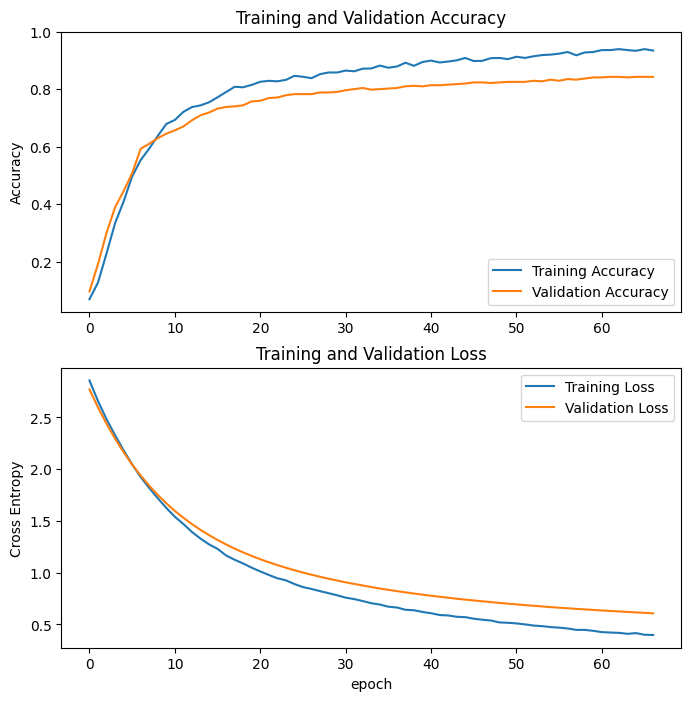

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
# plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# FINE TUNING

In [17]:
base_model.trainable = True

In [18]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  238


In [19]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 17)                21777     
                                                                 
 softmax (Softmax)           (None, 17)                0         
                                                             

In [21]:
fine_tune_epochs = 50
total_epochs =  history.epoch[-1] + fine_tune_epochs

history_fine = model.fit(train,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=test,
                         callbacks =[earlystopping])


Epoch 67/116
38/38 [==============================] - 9s 85ms/step - loss: 0.3007 - accuracy: 0.9113 - val_loss: 0.4490 - val_accuracy: 0.8450
Epoch 68/116
38/38 [==============================] - 2s 57ms/step - loss: 0.1113 - accuracy: 0.9685 - val_loss: 0.3840 - val_accuracy: 0.8779
Epoch 69/116
38/38 [==============================] - 2s 55ms/step - loss: 0.0594 - accuracy: 0.9892 - val_loss: 0.4297 - val_accuracy: 0.8798
Epoch 70/116
38/38 [==============================] - 2s 54ms/step - loss: 0.0286 - accuracy: 0.9942 - val_loss: 0.4964 - val_accuracy: 0.8605
Epoch 71/116
38/38 [==============================] - 2s 56ms/step - loss: 0.0210 - accuracy: 0.9950 - val_loss: 0.4962 - val_accuracy: 0.8566
Epoch 72/116
38/38 [==============================] - 2s 62ms/step - loss: 0.0084 - accuracy: 0.9992 - val_loss: 0.4451 - val_accuracy: 0.8779
Epoch 73/116
38/38 [==============================] - 2s 56ms/step - loss: 0.0063 - accuracy: 0.9992 - val_loss: 0.4189 - val_accuracy: 0.8818

In [22]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

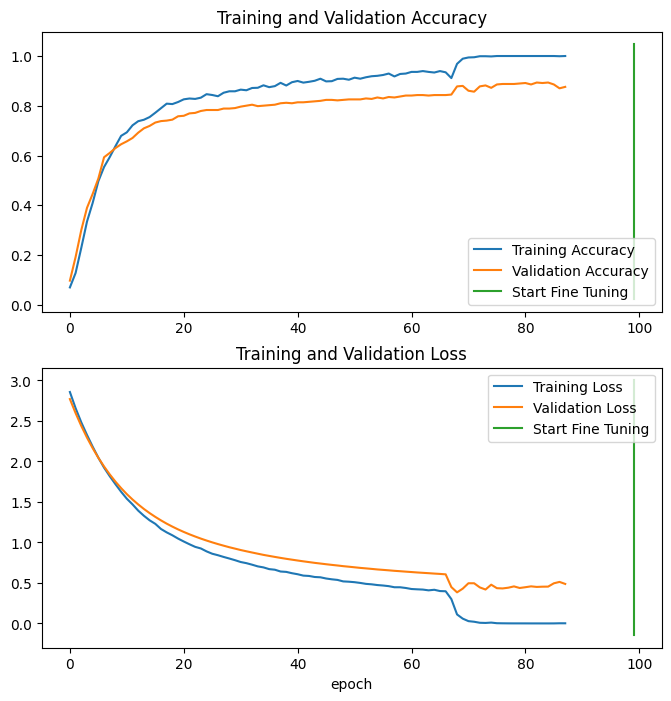

In [23]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
# plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
# plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()


# EVALUATION

In [24]:
loss, accuracy = model.evaluate(test)
print('Test accuracy :', accuracy)

17/17 [==============================] - 1s 24ms/step - loss: 0.4879 - accuracy: 0.8760
Test accuracy : 0.8759689927101135


In [25]:
y_pred = model.predict(test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.concatenate([y for x, y in test], axis=0)
y_true = np.argmax(y_true, axis=1)
print(y_true.shape, y_pred.shape)

17/17 [==============================] - 2s 21ms/step
(516,) (516,)


In [26]:
# F1 Score
f1 = f1_score(y_true, y_pred, average='weighted')
print("F1 score:", f1)

F1 score: 0.08348784972507281


Predictions:
 [11  7  8 13 11  9 13 11  9 11  8 11  7  1 14 11 15 13  6  6 11 16  8 14
  0  9 10 14 16 13 15 16]
Labels:
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 

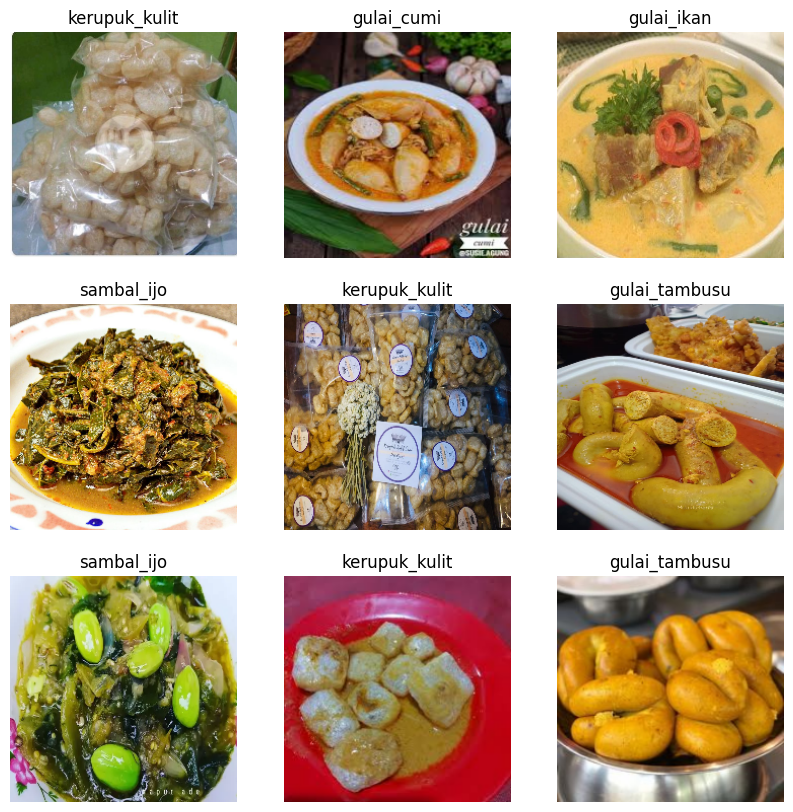

In [27]:
# Retrieve a batch of images from the test set
class_names = train.class_names
image_batch, label_batch = test.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)

# Apply a sigmoid since our model returns logits
predictions = tf.argmax(predictions, axis=1)


print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")


In [28]:
model.save("./savedModelEffNetFineTuned.h5")

# REGRESSION FOR PREDICTING CALORIE

In [7]:
import pandas as pd
csv_path = r'C:\Users\Rizvi Mahendra\Downloads\BANGKIT MODEL\DATASET SEHAT\KANTIN_SEHAT_DATASET_DATASET.csv'
data = pd.read_csv(csv_path)

In [ ]:
target_label = 